# 02 — One-Layer Neural Network

We now extend our single neuron to a full **layer**:
- Multiple input features (3)
- Multiple neurons (2)
- Weight matrix and bias vector

We’ll still use pure NumPy and manual gradient descent.


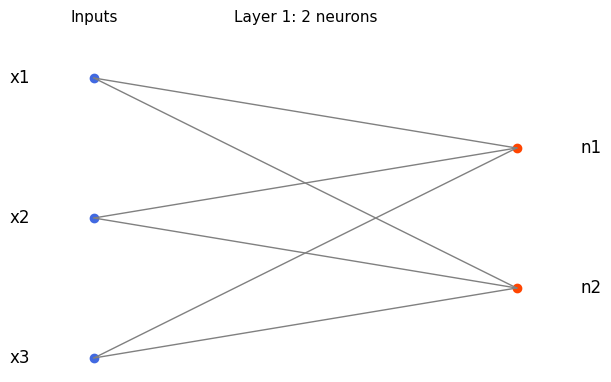

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Basic schematic layout
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis("off")

# Input nodes
input_y = [2.0, 1.0, 0.0]
for i, y in enumerate(input_y):
    ax.plot(0, y, "o", color="royalblue")
    ax.text(-0.3, y, f"x{i+1}", fontsize=12, ha="right", va="center")

# Hidden/output neurons
neuron_y = [1.5, 0.5]
for j, y in enumerate(neuron_y):
    ax.plot(2, y, "o", color="orangered")
    ax.text(2.3, y, f"n{j+1}", fontsize=12, ha="left", va="center")

# Connections (each input connects to each neuron)
for i, y1 in enumerate(input_y):
    for y2 in neuron_y:
        ax.plot([0, 2], [y1, y2], color="gray", lw=1)

ax.text(1, 2.4, "Layer 1: 2 neurons", fontsize=11, ha="center")
ax.text(0, 2.4, "Inputs", fontsize=11, ha="center")
plt.show()


Each orange neuron receives all three inputs, each scaled by its own weight.
All weights form a **matrix W (3×2)**, and biases form a **vector b (1×2)**.


In [2]:
import numpy as np

# --- Data: 1 sample, 3 input features ---
X = np.array([[0.6, 0.2, 0.9]])
y_true = np.array([[1.0, 0.0]])  # target outputs for 2 neurons

# --- Initialize weights and biases ---
W = np.random.randn(3, 2)  # 3 inputs -> 2 outputs
b = np.random.randn(1, 2)
lr = 0.1

# --- Forward pass ---
def forward(X, W, b):
    return np.dot(X, W) + b

# --- Loss (MSE) ---
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# --- Training loop ---
for epoch in range(20):
    # Forward
    y_pred = forward(X, W, b)
    loss = mse(y_true, y_pred)

    # --- Gradients ---
    dL_dy = 2 * (y_pred - y_true)           # shape (1, 2)
    dy_dW = X.T                             # shape (3, 1) for each output neuron
    dL_dW = np.dot(X.T, dL_dy)              # shape (3, 2)
    dL_db = dL_dy                           # same shape as bias (1, 2)

    # --- Update weights and biases ---
    W -= lr * dL_dW
    b -= lr * dL_db

    print(f"Epoch {epoch+1:02d}: loss={loss:.4f}")

print("\nFinal predictions:", forward(X, W, b))


Epoch 01: loss=0.3041
Epoch 02: loss=0.0947
Epoch 03: loss=0.0295
Epoch 04: loss=0.0092
Epoch 05: loss=0.0029
Epoch 06: loss=0.0009
Epoch 07: loss=0.0003
Epoch 08: loss=0.0001
Epoch 09: loss=0.0000
Epoch 10: loss=0.0000
Epoch 11: loss=0.0000
Epoch 12: loss=0.0000
Epoch 13: loss=0.0000
Epoch 14: loss=0.0000
Epoch 15: loss=0.0000
Epoch 16: loss=0.0000
Epoch 17: loss=0.0000
Epoch 18: loss=0.0000
Epoch 19: loss=0.0000
Epoch 20: loss=0.0000

Final predictions: [[ 9.99996045e-01 -5.38109593e-06]]
